<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [22]:
import biom
import arviz as az
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from util import extract_differentials
from matplotlib.ticker import MaxNLocator

%matplotlib inline

In [4]:
!ls ../sfari/data/sra/Kang2017/week0_ogu

differentials-v5.nc  differentials-v8-rarefy.nc  slurm-1275786.out
differentials-v7.nc  intermediate
differentials-v8.nc  intermediate_rarefy


In [11]:
# load 16S, whole genome shotgun and RNAseq data
kang_directory = '../sfari/data/sra/Kang2017'
posterior_name = 'age_sex_matched_posterior'
amp_fname = f'{kang_directory}/week0_ogu/differentials-v8.nc'
rare_fname = f'{kang_directory}/week0_ogu/differentials-v8-rarefy.nc'

amp_diffs = extract_differentials(amp_fname)
rare_diffs = extract_differentials(rare_fname)

common_taxa = list(set(amp_diffs.index) & set(rare_diffs.index))
amp_diffs = amp_diffs.loc[common_taxa]
rare_diffs = rare_diffs.loc[common_taxa]

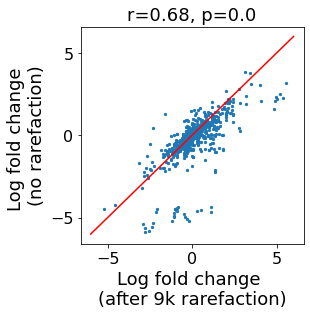

In [29]:
fs = 18
ls = 16
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(amp_diffs.mean(axis=1), rare_diffs.mean(axis=1), s=5)
idx = np.linspace(-6, 6)
ax.plot(idx, idx, '-r')
ax.set_xlabel('Log fold change \n(after 9k rarefaction)', fontsize=fs)
ax.set_ylabel('Log fold change \n(no rarefaction)', fontsize=fs)
r, p = pearsonr(amp_diffs.mean(axis=1), rare_diffs.mean(axis=1))
r, p = np.round(r, 2), np.round(p, 2)
ax.set_title(f'r={r}, p={p}', fontsize=fs)

ax.tick_params(axis='x', labelsize=ls)
ax.tick_params(axis='y', labelsize=ls)

locator = MaxNLocator(prune='both', nbins=3)
ax.xaxis.set_major_locator(locator)
ax.yaxis.set_major_locator(locator)